In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
import pandas as pd
import math as mt

from IPython.display import clear_output
from src import spotify, dp, utils, DB

db = DB()

## 사용자 메일 박스 조회

In [9]:
mail_box_id = "624a5beaa67bd720dc31a9ae"

tracks = db.get_mail_box(mail_box_id)
tracks.head()

,id,name,artists,artists_name,image
0,2y4hHM6c48Qzk0bqh33XfB,Winter Sleep,3HqSLMAZ3g3d5poNaI7GOU,IU,https://i.scdn.co/image/ab67616d0000b2730d378c...
1,1OQ3PoRZRtE7RH0NIh3p1O,Drawer,6zn0ihyAApAYV51zpXxdEp,10cm,https://i.scdn.co/image/ab67616d0000b273b22853...


## 사용자에게 추천된 음악 확인

In [10]:
reco_tracks = db.get_mail(mail_box_id)
reco_tracks.head()

,id,name,artists,artists_name,image
0,1e5qALs3pDrv203jX0XWAC,Autumn Breeze,0hRHbwZ0xSwfVHl4FTv7jq,Gummy,https://i.scdn.co/image/ab67616d0000b27339f1cc...
1,2RttW7RAu5nOAfq6YFvApB,Happier,6eUKZXaKkcviH0Ku9w2n3V,Ed Sheeran,https://i.scdn.co/image/ab67616d0000b273ba5db4...
2,1cayXr914ctuYeJkv3CPUR,Rest,6dhfy4ByARPJdPtMyrUYJK,Yerin Baek,https://i.scdn.co/image/ab67616d0000b273654022...
3,3P3UA61WRQqwCXaoFOTENd,Through the Night,3HqSLMAZ3g3d5poNaI7GOU,IU,https://i.scdn.co/image/ab67616d0000b273c06f0e...
4,5BqwC9kOBbqYkzdOKeXFFk,for lovers who hesitate,2SY6OktZyMLdOnscX3DCyS,JANNABI,https://i.scdn.co/image/ab67616d0000b273f694ad...


## 사용자가 맘에 들었던 음악 Select (Random 하게)

In [15]:
# sel_tracks = reco_tracks.sample(n=mt.floor(len(reco_tracks) * 0.075))
sel_tracks = reco_tracks[(reco_tracks['name'] == 'Rest') | (reco_tracks['name'] == 'for lovers who hesitate')]
db.new_mail_box_seed(mail_box_id, sel_tracks)

sel_tracks.head()

,id,name,artists,artists_name,image
2,1cayXr914ctuYeJkv3CPUR,Rest,6dhfy4ByARPJdPtMyrUYJK,Yerin Baek,https://i.scdn.co/image/ab67616d0000b273654022...
4,5BqwC9kOBbqYkzdOKeXFFk,for lovers who hesitate,2SY6OktZyMLdOnscX3DCyS,JANNABI,https://i.scdn.co/image/ab67616d0000b273f694ad...


## 재추천

In [16]:
# 1. Get Token
token = spotify.get_token()

genres = spotify.get_genres(token, sel_tracks)

og_features = spotify.get_features(token, tracks)
reply_features = spotify.get_features(token, sel_tracks)
db.observe_seed_zone(reply_features)

In [17]:
recos = spotify.get_recommend(sel_tracks,reply_features, genres, token,
                             og=tracks)
reco_features = spotify.get_features(token, recos)
reco_features.head()

,id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,2RttW7RAu5nOAfq6YFvApB,0.522,0.385,0,-7.355,0.0288,0.536,0.000000,0.1350,0.236,89.792
1,4fkmgDgXHfSi0VFz1wQqRb,0.756,0.328,0,-9.832,0.0344,0.745,0.000000,0.0981,0.451,85.097
2,6M2CiAIc4lZLAqJZPf690z,0.462,0.285,0,-10.352,0.0574,0.915,0.000007,0.1440,0.411,74.136
3,6mDoM5FGbr1Or5nY9pTnLy,0.635,0.496,0,-7.301,0.0936,0.443,0.000000,0.1210,0.373,121.696
4,4rwqrKdwlFWJ6LvPYaOtgn,0.440,0.413,0,-7.365,0.0407,0.105,0.000034,0.0997,0.141,86.911


In [18]:
# 합치기
sel_tracks = pd.concat([tracks,sel_tracks], ignore_index=True)
features = pd.concat([og_features, reply_features], ignore_index=True)

features.head()

,id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,2y4hHM6c48Qzk0bqh33XfB,0.539,0.237,0,-8.452,0.0273,0.820,0.000000,0.345,0.259,68.045
1,1OQ3PoRZRtE7RH0NIh3p1O,0.359,0.469,7,-8.060,0.0326,0.745,0.000000,0.101,0.259,84.366
2,1cayXr914ctuYeJkv3CPUR,0.677,0.376,0,-9.033,0.0350,0.941,0.000009,0.177,0.318,83.001
3,5BqwC9kOBbqYkzdOKeXFFk,0.520,0.431,10,-8.484,0.0284,0.705,0.000264,0.301,0.302,74.004


In [19]:
norm_features = dp.make_norm(features, reco_features)

norm_features.head()

,id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,2y4hHM6c48Qzk0bqh33XfB,0.438031,0.217321,0.000000,0.538797,0.005503,0.853376,0.000000,0.608464,0.254802,0.053614
1,1OQ3PoRZRtE7RH0NIh3p1O,0.132428,0.529317,0.636364,0.579516,0.017657,0.774262,0.000000,0.125964,0.254802,0.196758
2,1cayXr914ctuYeJkv3CPUR,0.672326,0.404250,0.000000,0.478446,0.023160,0.981013,0.000026,0.276251,0.326526,0.184787
3,5BqwC9kOBbqYkzdOKeXFFk,0.405772,0.478214,0.909091,0.535473,0.008026,0.732068,0.000717,0.521455,0.307075,0.105878
4,2RttW7RAu5nOAfq6YFvApB,0.409168,0.416353,0.000000,0.652747,0.008943,0.553797,0.000000,0.193198,0.226842,0.244347


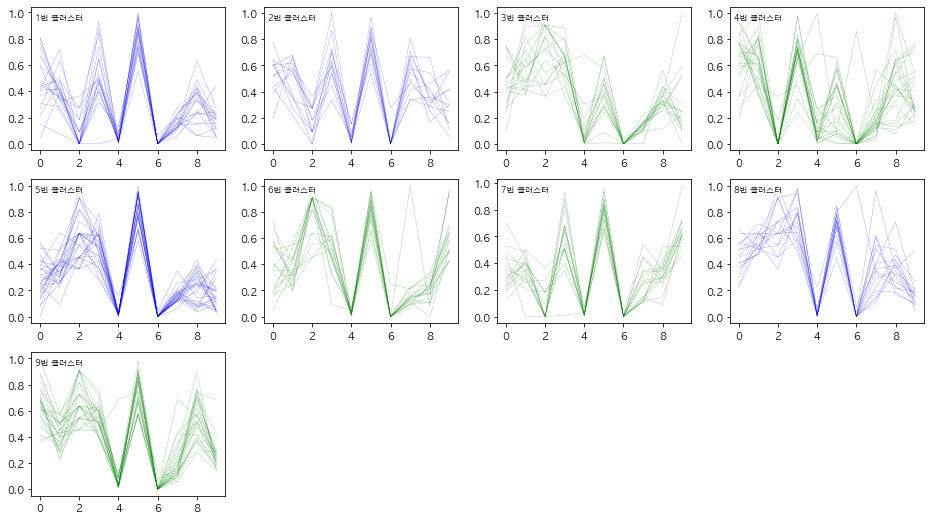

In [20]:
kmeans = utils.KMeans(
    datas=norm_features
)
kmeans.run(early_stop_cnt=5)
clear_output(wait=True)

utils.visual_cluster_data(sel_tracks, kmeans)
_filtering_music_list = dp.music_filtering(sel_tracks, kmeans)

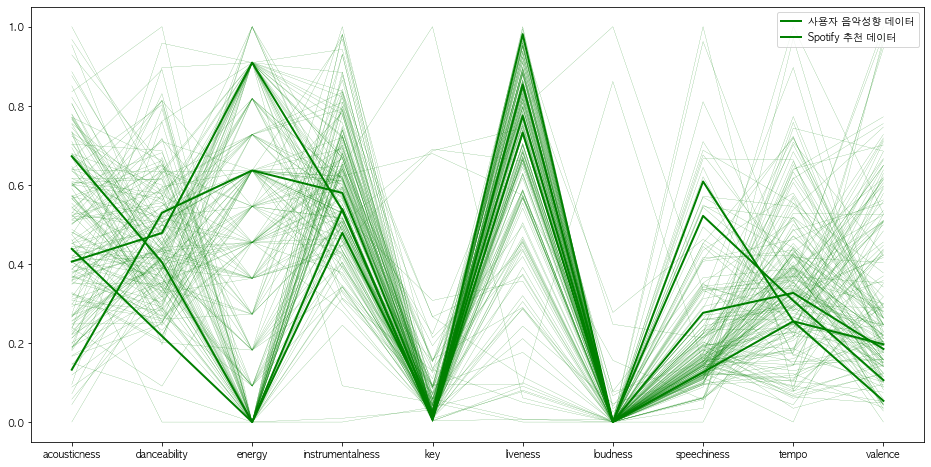

In [21]:
utils.visual_norm_data(sel_tracks, norm_features)

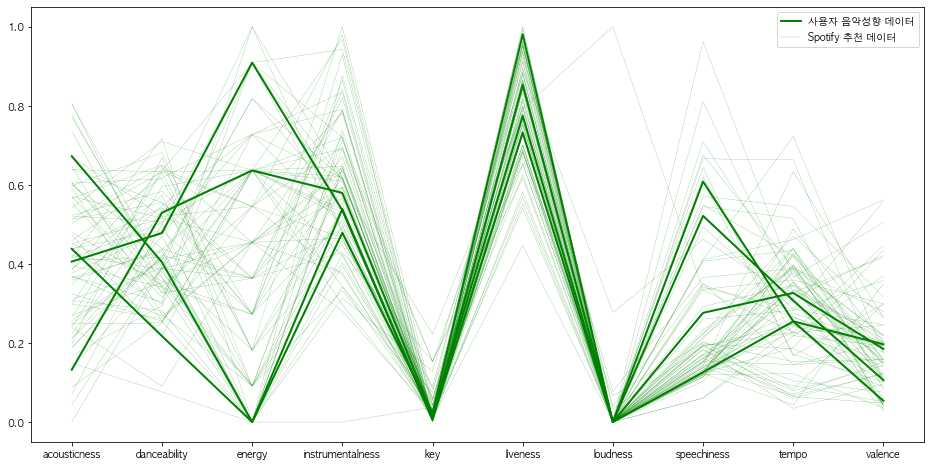

,id,name,artists,artists_name,image
0,2RttW7RAu5nOAfq6YFvApB,Happier,6eUKZXaKkcviH0Ku9w2n3V,Ed Sheeran,https://i.scdn.co/image/ab67616d0000b273ba5db4...
1,4fkmgDgXHfSi0VFz1wQqRb,Moon,6OwKE9Ez6ALxpTaKcT5ayv,AKMU,https://i.scdn.co/image/ab67616d0000b273d41cdd...
2,6M2CiAIc4lZLAqJZPf690z,I'm in Love (Piano Remix),6zPbaYJp7itQ8p0gPLqf2S,Ra.D,https://i.scdn.co/image/ab67616d0000b2737c4285...
7,01jZKFyNcPRUP2gX9zxScj,fall,6aLdhHUqgdKE86xbtNmY8g,Crush,https://i.scdn.co/image/ab67616d0000b273370c14...
9,36UcoqH2P24RtSGbLKLK3w,Hello Tutorial,5HenzRvMtSrgtvU16XAoby,Zion.T,https://i.scdn.co/image/ab67616d0000b273cd83d5...


In [22]:
filter_music = norm_features.set_index("id").loc[_filtering_music_list].reset_index()
reco_musics = [_ in _filtering_music_list for _ in recos['id']]

utils.visual_norm_data(sel_tracks, filter_music)
recos[reco_musics].head()

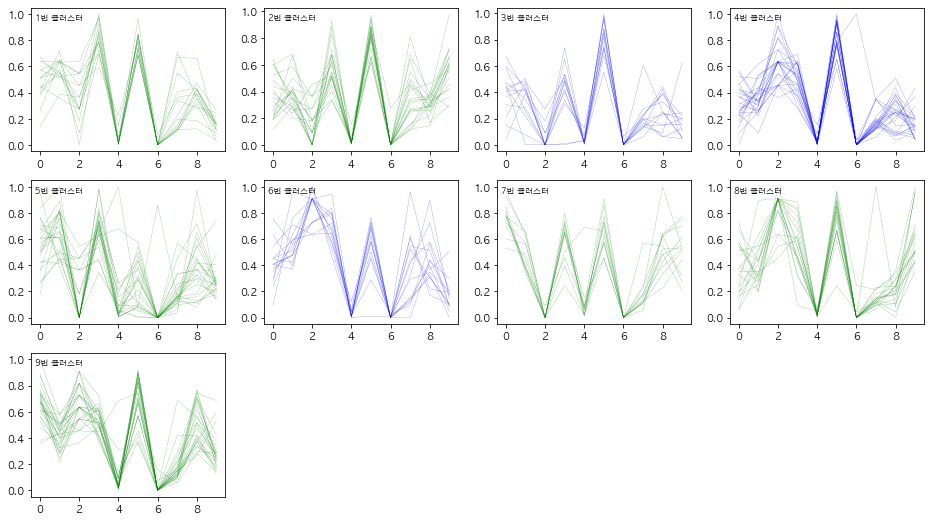

In [23]:
filter_music_list, kmeans = utils.reco_KMeans(norm_features, sel_tracks)

utils.visual_cluster_data(sel_tracks, kmeans)

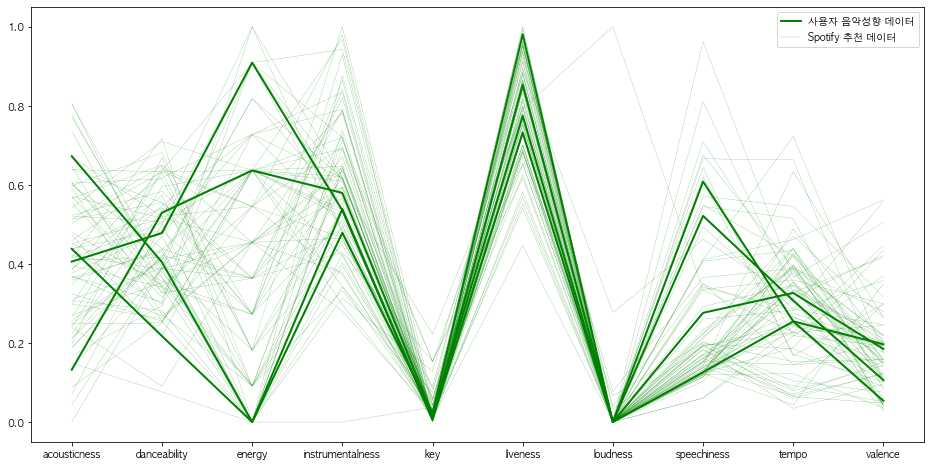

,id,name,artists,artists_name,image
0,2RttW7RAu5nOAfq6YFvApB,Happier,6eUKZXaKkcviH0Ku9w2n3V,Ed Sheeran,https://i.scdn.co/image/ab67616d0000b273ba5db4...
1,4fkmgDgXHfSi0VFz1wQqRb,Moon,6OwKE9Ez6ALxpTaKcT5ayv,AKMU,https://i.scdn.co/image/ab67616d0000b273d41cdd...
2,6M2CiAIc4lZLAqJZPf690z,I'm in Love (Piano Remix),6zPbaYJp7itQ8p0gPLqf2S,Ra.D,https://i.scdn.co/image/ab67616d0000b2737c4285...
7,01jZKFyNcPRUP2gX9zxScj,fall,6aLdhHUqgdKE86xbtNmY8g,Crush,https://i.scdn.co/image/ab67616d0000b273370c14...
9,36UcoqH2P24RtSGbLKLK3w,Hello Tutorial,5HenzRvMtSrgtvU16XAoby,Zion.T,https://i.scdn.co/image/ab67616d0000b273cd83d5...


In [24]:
filter_music = norm_features.set_index("id").loc[_filtering_music_list].reset_index()
reco_musics = [_ in _filtering_music_list for _ in recos['id']]

utils.visual_norm_data(sel_tracks, filter_music)
recos[reco_musics].head()

In [36]:
recos[reco_musics]['image'][7]

'https://i.scdn.co/image/ab67616d0000b273370c146e259dc6aa851d681c'

In [16]:
db.new_mail(mail_box_id,
           recos[reco_musics])

In [17]:
genres

,artists,genres
0,7qKWQnE3S7v8m3rLwMVdGg,pop
1,0dTj3SqwE8kPnCzyzvYzhT,"chill,k-pop"
2,5VxfguafjfSdJcN10ACVZe,"k-pop,hip-hop,pop"
3,7n2wHs1TKAczGzO7Dd2rGr,pop
4,7mDU6nMUJnOSY2Hkjz5oqM,"hip-hop,pop"


In [18]:
spotify.get_genres(token,recos[reco_musics])

KeyError: 'artists'